In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("thyroid_cancer_risk_data.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
df['Diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [ ]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [ ]:
df['Age'].unique()
# df['Age'].nunique()

array([66, 29, 86, 75, 35, 89, 38, 17, 36, 67, 16, 44, 52, 78, 74, 47, 72,
       63, 73, 56, 76, 61, 65, 69, 21, 87, 53, 32, 18, 28, 23, 85, 58, 22,
       49, 50, 64, 20, 68, 77, 48, 88, 62, 54, 40, 55, 43, 59, 79, 15, 25,
       19, 42, 26, 37, 51, 41, 57, 27, 46, 80, 71, 84, 70, 33, 82, 31, 83,
       30, 34, 81, 45, 39, 60, 24])

In [ ]:
number_count = df['Gender'].value_counts()
number_count

,count
Gender,
Female,127527
Male,85164


In [ ]:
very_age_groupby = df.groupby('Thyroid_Cancer_Risk')['Age'].value_counts().reset_index().sort_values(by = 'Age', ascending = False)
very_age_groupby

,Thyroid_Cancer_Risk,Age,count
45,High,89,421
169,Medium,89,985
131,Low,89,1416
17,High,88,440
196,Medium,88,958
...,...,...,...
77,Low,16,1516
190,Medium,16,960
56,High,15,412
129,Low,15,1424


In [ ]:
df['Family_History'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk_Score'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)

selected_columns = ['TSH_Level','T3_Level','T4_Level','Risk_Score','Nodule_Size']
corr = df[selected_columns].corr()
corr

,TSH_Level,T3_Level,T4_Level,Risk_Score,Nodule_Size
TSH_Level,1.000000,0.000335,-0.000795,0.002494,0.000416
T3_Level,0.000335,1.000000,-0.004069,-0.000348,-0.001799
T4_Level,-0.000795,-0.004069,1.000000,0.002761,-0.001860
Risk_Score,0.002494,-0.000348,0.002761,1.000000,-0.000352
Nodule_Size,0.000416,-0.001799,-0.001860,-0.000352,1.000000


In [ ]:
# What is the frequency of different risk levels (e.g., low, medium, high)?
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk_Score'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)
df['Risk_Score'].value_counts()

,count
Risk_Score,
0,108388
1,72400
2,31903


In [ ]:
# Do patients with a family history of thyroid disease have higher risk levels?
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk_Score'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)
high_risk = df.groupby('Family_History')['Risk_Score'].value_counts()
high_risk

Family_History  Risk_Score
No              0             82242
                1             54948
                2             11676
Yes             0             26146
                2             20227
                1             17452
Name: count, dtype: int64

In [ ]:
# What is the correlation between TSH, T3, T4, and thyroid cancer risk?
symptom_cols = [
    'Family_History',
    'Radiation_Exposure',
    'Iodine_Deficiency',
    'Smoking',
    'Obesity',
    'Diabetes'
]
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0, 'true': 1, 'false': 0})

df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].astype(str)

symptom_by_risk = df.groupby('Thyroid_Cancer_Risk')[symptom_cols].mean().T

if 'High' in symptom_by_risk.columns:
    symptom_by_risk = symptom_by_risk.sort_values(by='High', ascending=False)

symptom_by_risk

Thyroid_Cancer_Risk,High,Low,Medium
Family_History,0.634016,0.241226,0.241050
Iodine_Deficiency,0.471962,0.209968,0.209986
Radiation_Exposure,0.309375,0.121942,0.121174
Obesity,0.296931,0.300974,0.300981
Diabetes,0.200796,0.201000,0.198909
Smoking,0.199636,0.200483,0.197956


### The analysis of symptoms across thyroid cancer risk levels shows that family history, radiation exposure, and iodine deficiency are the most prominent factors among individuals at high risk for thyroid cancer. These are followed by obesity, diabetes, and smoking, which also appear more frequently in high-risk individuals but to a slightly lesser extent. This suggests that genetic factors and environmental exposures play a stronger role in thyroid cancer risk compared to lifestyle-related conditions.

In [ ]:
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk_Score'] = df['Thyroid_Cancer_Risk'].map(risk_mapping)
selected_columns = ['Risk_Score','Family_History']
corr = df[selected_columns].corr()
corr

,Risk_Score,Family_History
Risk_Score,1.000000,0.239961
Family_History,0.239961,1.000000


In [ ]:
riskby_Country = df.groupby('Country')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score', ascending = False)
riskby_Country

,Country,Risk_Score,count
5,China,2,3469
2,Brazil,2,2308
10,India,2,13965
8,Germany,2,1117
17,Nigeria,2,3357
14,Japan,2,1697
23,South Korea,2,1571
20,Russia,2,2226
29,USA,2,1086
26,UK,2,1107


In [ ]:
# How does the risk vary across different geographic locations?
riskby_Country = df.groupby('Country')['Risk_Score'].mean().reset_index().sort_values(by = 'Risk_Score', ascending = False)
riskby_Country

,Country,Risk_Score
3,India,0.925828
0,Brazil,0.577546
7,South Korea,0.574206
1,China,0.572487
5,Nigeria,0.570180
6,Russia,0.566324
2,Germany,0.565502
9,USA,0.564785
4,Japan,0.560621
8,UK,0.558730


In [ ]:
riskby_region = df.groupby('Ethnicity')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score', ascending = False)
riskby_region

,Ethnicity,Risk_Score,count
2,African,2,8209
4,Asian,2,17829
8,Caucasian,2,3200
11,Hispanic,2,1575
14,Middle Eastern,2,1090
5,Asian,1,14178
1,African,1,13587
13,Middle Eastern,1,8200
10,Hispanic,1,12167
7,Caucasian,1,24268


In [ ]:
riskby_region = df.groupby('Ethnicity')['Risk_Score'].mean().reset_index().sort_values(by = 'Risk_Score', ascending = False)
riskby_region

,Ethnicity,Risk_Score
1,Asian,0.935694
0,African,0.707432
4,Middle Eastern,0.486524
2,Caucasian,0.481679
3,Hispanic,0.478477


In [ ]:
gender_vise_avg = df.groupby('Gender')['Risk_Score'].mean().reset_index().sort_values(by = 'Risk_Score', ascending = False)
gender_vise_avg

,Gender,Risk_Score
0,Female,0.643260
1,Male,0.636102


In [ ]:
gender_vise_counts = df.groupby('Gender')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score', ascending = False)
gender_vise_counts

,Gender,Risk_Score,count
5,Male,2,12606
2,Female,2,19297
4,Male,1,28961
1,Female,1,43439
0,Female,0,64791
3,Male,0,43597


In [ ]:
Gender_vs_risk = pd.crosstab(df['Gender'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Gender_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Gender                                              
Female               15.131698  50.805712  34.062591
Male                 14.802029  51.191818  34.006153


In [ ]:
risk_by_Family_History = df.groupby('Family_History')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score')
risk_by_Family_History

,Family_History,Risk_Score,count
0,0,0,82242
3,1,0,26146
1,0,1,54948
5,1,1,17452
2,0,2,11676
4,1,2,20227


In [ ]:
Obesity_vs_risk = pd.crosstab(df['Family_History'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Obesity_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Family_History                                      
0                     7.843295  55.245657  36.911048
1                    31.691344  40.965139  27.343517


In [ ]:
risk_by_Diabetes = df.groupby('Diabetes')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score')
risk_by_Diabetes

,Diabetes,Risk_Score,count
0,0,0,86602
3,1,0,21786
1,0,1,57999
4,1,1,14401
2,0,2,25497
5,1,2,6406


In [ ]:
Diabetes_vs_risk = pd.crosstab(df['Diabetes'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Diabetes_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Diabetes                                            
0                    14.989594  50.913003  34.097403
1                    15.040030  51.149250  33.810720


In [ ]:
risk_by_Diagnosis = df.groupby('Diagnosis')['Risk_Score'].value_counts().reset_index().sort_values(by = 'Risk_Score')
risk_by_Diagnosis

,Diagnosis,Risk_Score,count
0,Benign,0,92153
4,Malignant,0,16235
5,Malignant,1,10921
1,Benign,1,61479
3,Malignant,2,22339
2,Benign,2,9564


In [ ]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

risk_by_age_group_avg = df.groupby('Age_Group')['Risk_Score'].mean().sort_values(ascending=False)
print(risk_by_age_group_avg)

Age_Group
41–50    0.647262
61–70    0.643878
81+      0.643480
71–80    0.641959
0–20     0.639789
31–40    0.636883
51–60    0.634906
21–30    0.634808
Name: Risk_Score, dtype: float64


/tmp/ipython-input-98-1835859962.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age_group_avg = df.groupby('Age_Group')['Risk_Score'].mean().sort_values(ascending=False)


In [ ]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

risk_by_age_group_counts = df.groupby('Age_Group')['Risk_Score'].value_counts()
print(risk_by_age_group_counts)

Age_Group  Risk_Score
0–20       0              7285
           1              4813
           2              2152
21–30      0             14571
           1              9639
           2              4197
31–40      0             14588
           1              9681
           2              4237
41–50      0             14325
           1              9715
           2              4321
51–60      0             14630
           1              9637
           2              4227
61–70      0             14159
           1              9728
           2              4168
71–80      0             14611
           1              9656
           2              4361
81+        0             14219
           1              9531
           2              4240
Name: count, dtype: int64


/tmp/ipython-input-99-530779088.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age_group_counts = df.groupby('Age_Group')['Risk_Score'].value_counts()


In [ ]:
iodine_vs_risk = pd.crosstab(df['Iodine_Deficiency'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(iodine_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Iodine_Deficiency                                   
0                    10.550312  53.628353  35.821335
1                    28.399789  42.925044  28.675167


In [ ]:
Radiation_vs_risk = pd.crosstab(df['Radiation_Exposure'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Radiation_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Radiation_Exposure                                  
0                    12.184305  52.629804  35.185892
1                    30.979284  41.484620  27.536095


In [ ]:
Smoking_vs_risk = pd.crosstab(df['Smoking'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Smoking_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Smoking                                             
0                    14.997063  50.897451  34.105486
1                    15.010252  51.212557  33.777191


In [ ]:
Obesity_vs_risk = pd.crosstab(df['Obesity'], df['Thyroid_Cancer_Risk'], normalize='index') * 100
print(Obesity_vs_risk)

Thyroid_Cancer_Risk       High        Low     Medium
Obesity                                             
0                    15.073418  50.916300  34.010282
1                    14.827975  51.062831  34.109195


In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']

result = pd.crosstab(high_risk_df['Country'], high_risk_df['Family_History'], normalize='index') * 100
result = result.sort_values(by = 1,ascending=False)
result

Family_History,0,1
Country,,
Germany,19.068935,80.931065
Russia,19.541779,80.458221
China,19.803978,80.196022
Japan,19.976429,80.023571
USA,20.349908,79.650092
South Korea,20.369192,79.630808
Brazil,21.057192,78.942808
Nigeria,21.298779,78.701221
UK,21.318880,78.681120


In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']

result = pd.crosstab(high_risk_df['Country'], high_risk_df['Family_History'], margins = True)
result = result.sort_values(by = 1,ascending=False)
result

Family_History,0,1,All
Country,,,
All,11676,20227,31903
India,8024,5941,13965
China,687,2782,3469
Nigeria,715,2642,3357
Brazil,486,1822,2308
Russia,435,1791,2226
Japan,339,1358,1697
South Korea,320,1251,1571
Germany,213,904,1117


In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']

result = pd.crosstab(high_risk_df['Country'], high_risk_df['Gender'], normalize='index') * 100
result = result.sort_values(by = 'Male',ascending=False)
result

Gender,Female,Male
Country,,
UK,55.736224,44.263776
Japan,59.281084,40.718916
Nigeria,59.904677,40.095323
Germany,60.250671,39.749329
Russia,60.601977,39.398023
South Korea,60.661999,39.338001
India,60.723237,39.276763
Brazil,60.745234,39.254766
USA,60.957643,39.042357


##### The cross-tabulation of countries with high thyroid cancer risk by gender reveals that in most countries, males have a higher proportion of high-risk cases compared to females. Countries at the top of the list show a greater percentage of males among high-risk individuals, indicating possible gender-related or occupational exposure differences. This insight can help target awareness and screening efforts more effectively in these regions.

In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']

result = pd.crosstab(high_risk_df['Country'], high_risk_df['Gender'], margins = True)
result = result.sort_values(by = 'Male',ascending=False)
result

Gender,Female,Male,All
Country,,,
All,19297,12606,31903
India,8480,5485,13965
Nigeria,2011,1346,3357
China,2144,1325,3469
Brazil,1402,906,2308
Russia,1349,877,2226
Japan,1006,691,1697
South Korea,953,618,1571
UK,617,490,1107


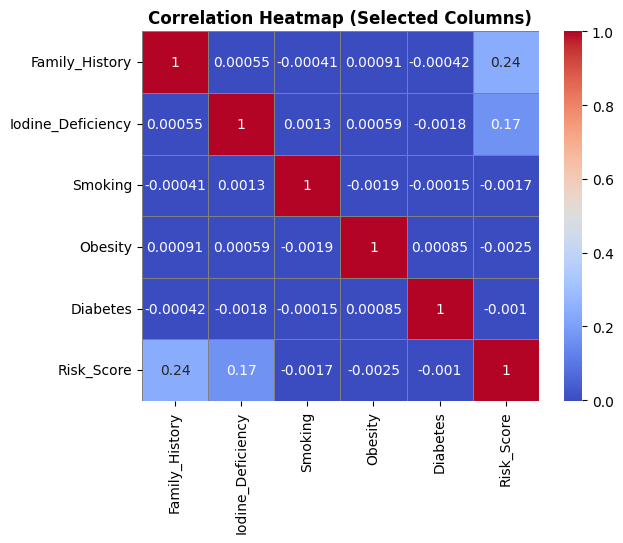

In [ ]:
selected_columns = ['Family_History', 'Iodine_Deficiency','Smoking','Obesity','Diabetes','Risk_Score']

corr = df[selected_columns].corr()

sns.heatmap(corr, annot = True, cmap="coolwarm",linewidths=0.5,linecolor='gray')
plt.title("Correlation Heatmap (Selected Columns)",fontweight='bold')
plt.show()

#### The correlation heatmap reveals that family history (0.24) and iodine deficiency (0.17) have the strongest positive correlations with thyroid cancer risk, indicating they may be significant contributing factors. In contrast, variables such as smoking, obesity, and diabetes show negligible correlation with the risk score, suggesting a minimal direct impact in this dataset.

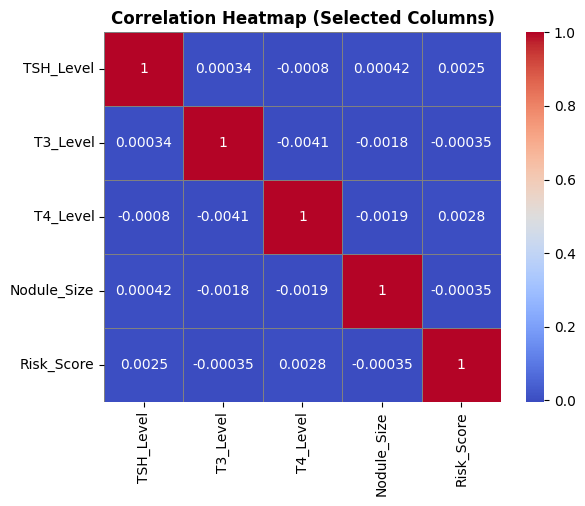

In [ ]:
selected_columns = ['TSH_Level', 'T3_Level','T4_Level','Nodule_Size','Risk_Score']

corr = df[selected_columns].corr()

sns.heatmap(corr, annot = True, cmap="coolwarm",linewidths=0.5,linecolor='gray')
plt.title("Correlation Heatmap (Selected Columns)",fontweight='bold')
plt.show()

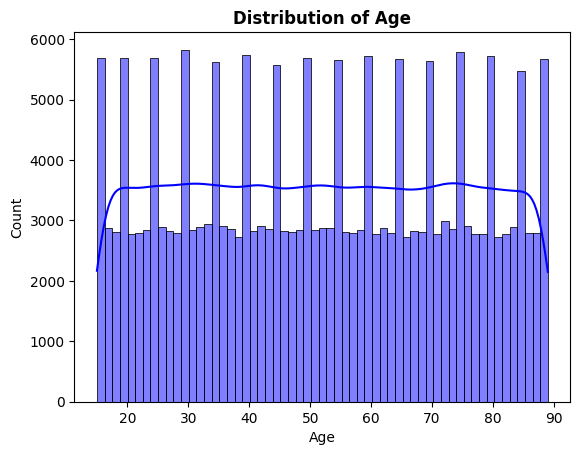

In [ ]:
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age',fontweight='bold')
plt.show()

/tmp/ipython-input-113-525929896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_of_risk.index, y=counts_of_risk.values,palette='Set2',edgecolor = "black")


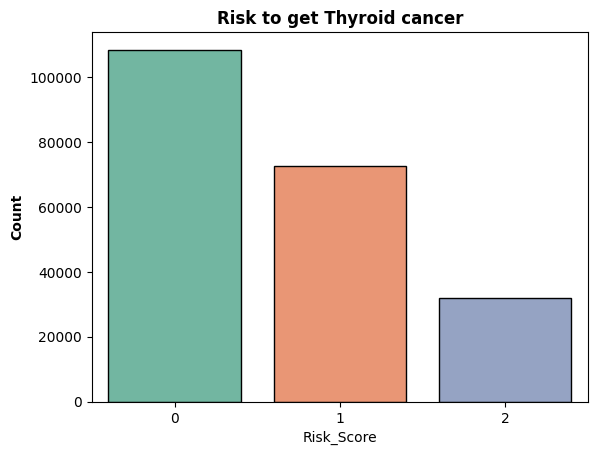

In [ ]:
counts_of_risk = df['Risk_Score'].value_counts()
sns.barplot(x=counts_of_risk.index, y=counts_of_risk.values,palette='Set2',edgecolor = "black")
plt.title('Risk to get Thyroid cancer',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

#### The bar chart shows that the majority of individuals fall under Risk Score 0, indicating low risk for thyroid cancer. Fewer patients are classified under moderate (1) and high risk (2) categories, suggesting that most of the population in the dataset is not at immediate risk of developing thyroid cancer.

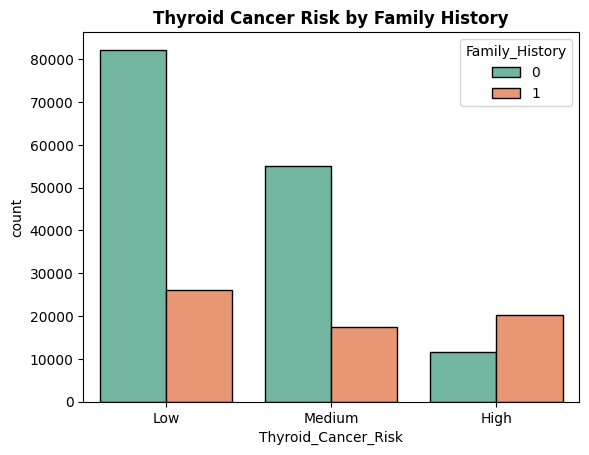

In [ ]:
sns.countplot(data=df, x='Thyroid_Cancer_Risk', hue='Family_History',palette='Set2',edgecolor = "black")
plt.title('Thyroid Cancer Risk by Family History',fontweight='bold')
plt.show()

#### The bar chart shows that individuals with a family history of thyroid issues (Family_History = 1) are more likely to fall into the high-risk category compared to those without a family history. Conversely, people with no family history (Family_History = 0) are more concentrated in the low-risk group, highlighting family history as a potential contributing factor to increased thyroid cancer risk.

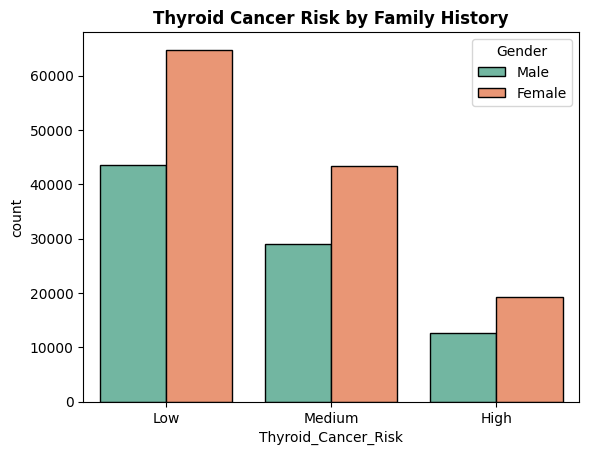

In [ ]:
sns.countplot(data=df, x='Thyroid_Cancer_Risk', hue='Gender',palette='Set2',edgecolor = "black")
plt.title('Thyroid Cancer Risk by Family History',fontweight='bold')
plt.show()

#### The chart shows that females have a higher distribution across all levels of thyroid cancer risk compared to males, with a particularly noticeable presence in the high-risk category. This suggests that gender may play a role in thyroid cancer susceptibility, with females being more prone to higher risk levels in this dataset.

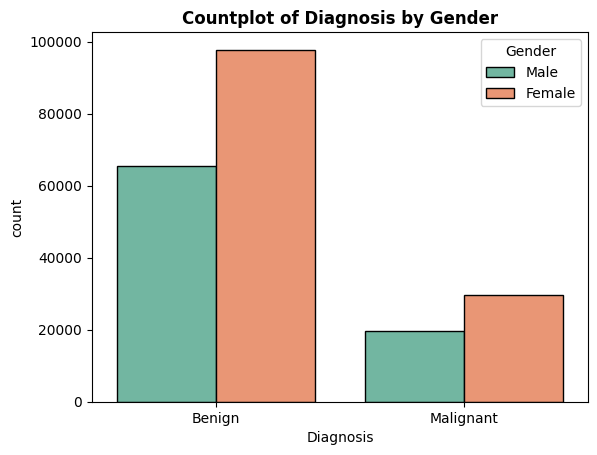

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='Gender',palette='Set2',edgecolor = "black")
plt.title('Countplot of Diagnosis by Gender',fontweight='bold')
plt.show()

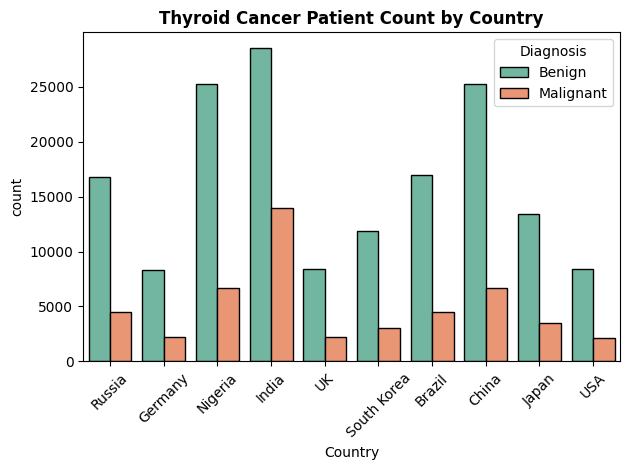

In [ ]:
sns.countplot(data=df, x='Country', hue='Diagnosis',palette='Set2',edgecolor = "black")
plt.title('Thyroid Cancer Patient Count by Country',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The bar chart shows that India, China, and Nigeria have the highest number of thyroid cancer patients overall, with India leading in both benign and malignant cases. While most countries show a higher count of benign diagnoses, India also reports the highest number of malignant cases, indicating a significant need for early screening and intervention.

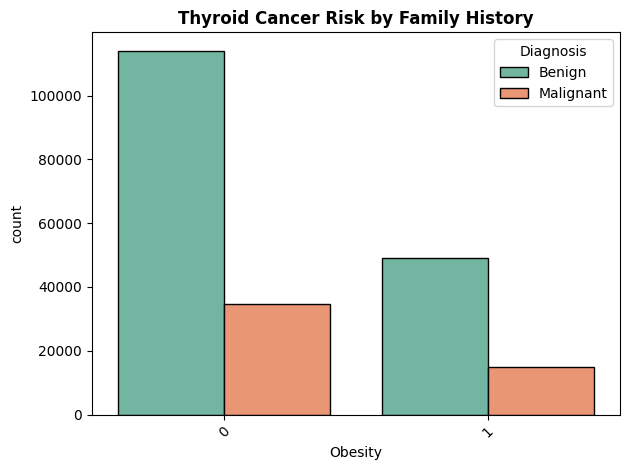

In [ ]:
sns.countplot(data=df, x='Obesity', hue='Diagnosis',palette='Set2',edgecolor = "black")
plt.title('Thyroid Cancer Diagnosis by Obesity Status',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-117-2823885316.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['TSH_Level'], kde=True, color='blue',palette='Set2',edgecolor = "black")


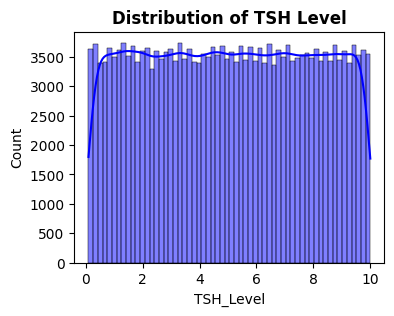

/tmp/ipython-input-117-2823885316.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['T3_Level'], kde=True, color='green',palette='Set2',edgecolor = "black")


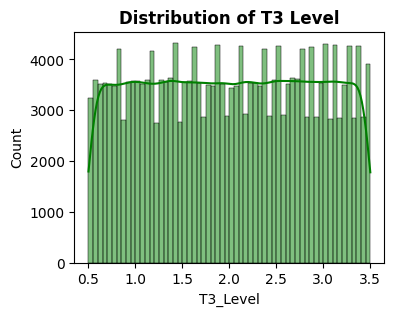

/tmp/ipython-input-117-2823885316.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['T4_Level'], kde=True, color='orange',palette='Set2',edgecolor = "black")


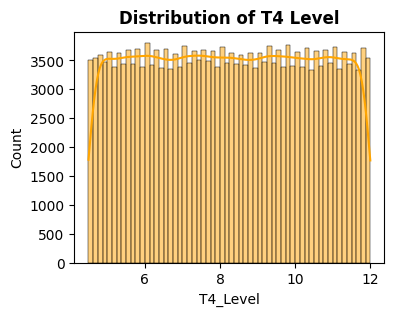

In [ ]:
plt.figure(figsize=(4, 3))
sns.histplot(df['TSH_Level'], kde=True, color='blue',palette='Set2',edgecolor = "black")
plt.title('Distribution of TSH Level',fontweight='bold')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['T3_Level'], kde=True, color='green',palette='Set2',edgecolor = "black")
plt.title('Distribution of T3 Level',fontweight='bold')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['T4_Level'], kde=True, color='orange',palette='Set2',edgecolor = "black")
plt.title('Distribution of T4 Level',fontweight='bold')
plt.show()

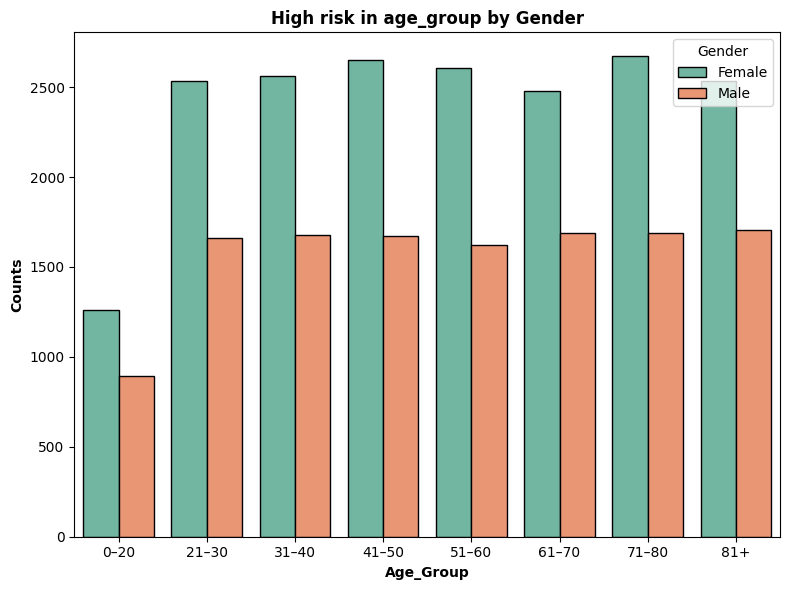

In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']
pd.crosstab(high_risk_df['Age_Group'], high_risk_df['Gender'])

plt.figure(figsize=(8, 6))
sns.countplot(data = high_risk_df, x = 'Age_Group' , hue = 'Gender',palette='Set2',edgecolor = "black")
plt.xlabel('Age_Group',fontweight='bold')
plt.ylabel("Counts",fontweight='bold')
plt.legend(title="Gender")
plt.title('High risk in age_group by Gender',fontweight='bold')
plt.tight_layout()
plt.show()


#### The chart shows that females consistently have a higher count of high-risk thyroid cancer cases across all age groups compared to males. The number of high-risk cases peaks in the 71–80 and 81+ age groups for both genders, highlighting that age and gender together play a significant role in thyroid cancer risk, with elderly females being the most affected.

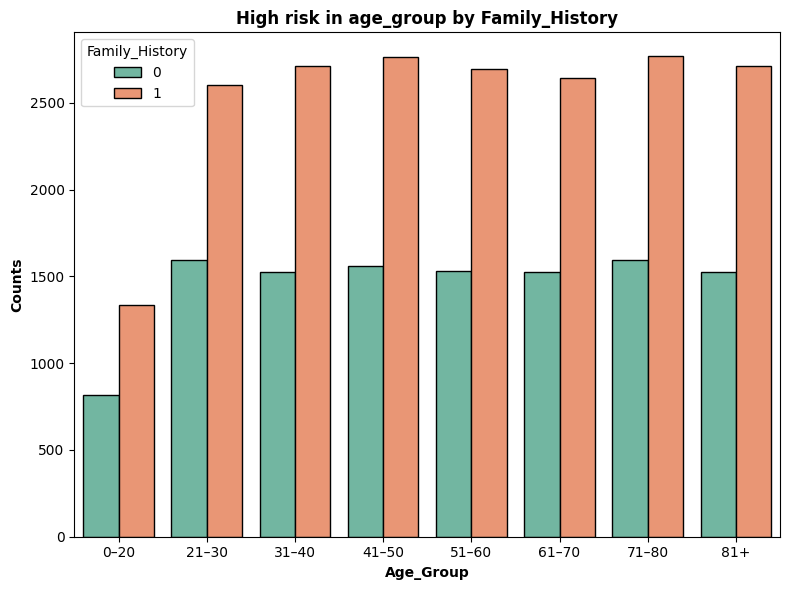

In [ ]:
high_risk_df = df[df['Thyroid_Cancer_Risk'] == 'High']
pd.crosstab(high_risk_df['Age_Group'], high_risk_df['Family_History'])

plt.figure(figsize=(8, 6))
sns.countplot(data = high_risk_df, x = 'Age_Group' , hue = 'Family_History',palette='Set2',edgecolor = "black")
plt.xlabel('Age_Group',fontweight='bold')
plt.ylabel("Counts",fontweight='bold')
plt.legend(title="Family_History")
plt.title('High risk in age_group by Family_History',fontweight='bold')
plt.tight_layout()
plt.show()


#### The chart illustrates that individuals with a family history of thyroid issues (Family_History = 1) have significantly higher counts of high-risk thyroid cancer across all age groups compared to those without a family history (Family_History = 0). This pattern suggests a strong genetic or hereditary link in thyroid cancer risk, especially noticeable from age group 21–30 onward, where the gap between the two categories remains consistently wide.

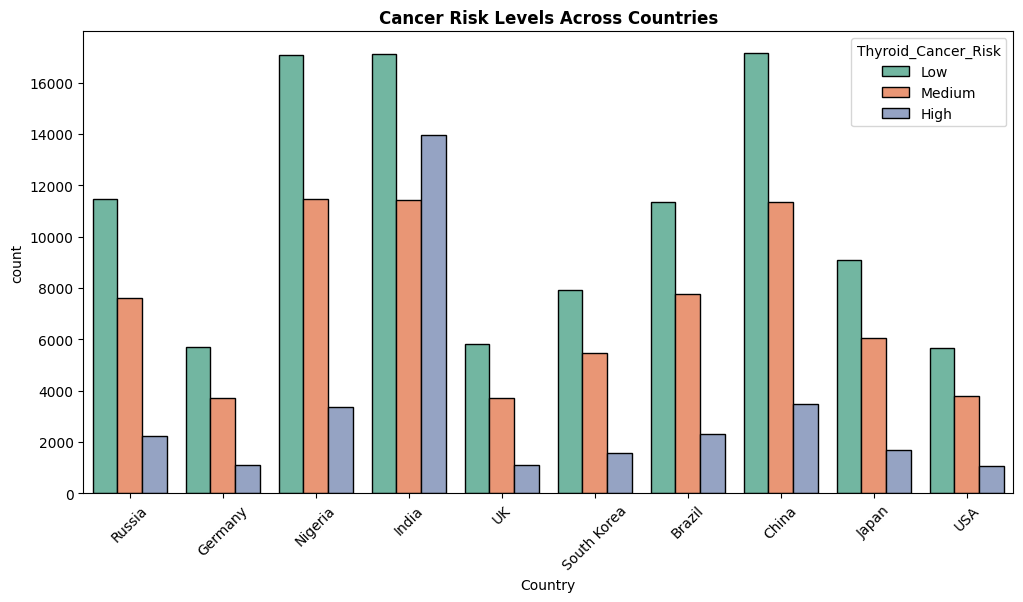

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', hue='Thyroid_Cancer_Risk',palette='Set2',edgecolor = "black")
plt.title('Cancer Risk Levels Across Countries',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

#### The bar chart shows that countries like India, China, and Nigeria have the highest counts of thyroid cancer cases, particularly in the low and medium risk categories. However, India stands out with a relatively high number of high-risk cases compared to other nations. In contrast, countries like the USA, Germany, and UK report lower overall counts across all risk levels.

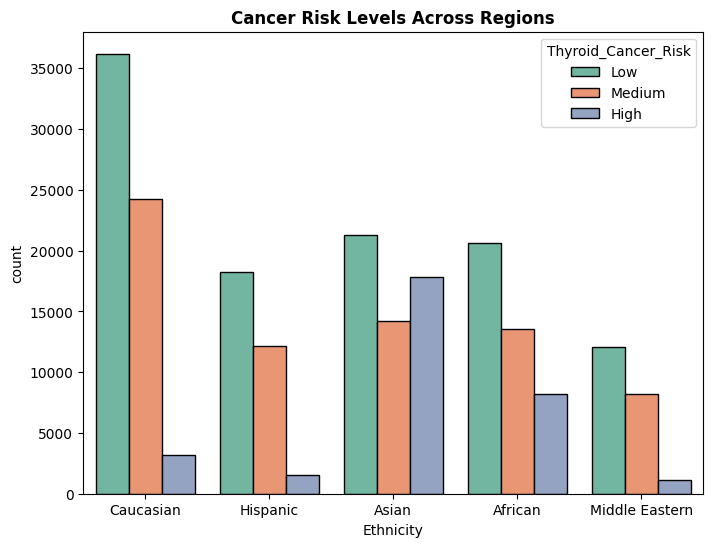

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Ethnicity', hue='Thyroid_Cancer_Risk',palette='Set2',edgecolor = "black")
plt.title('Cancer Risk Levels Across Regions',fontweight='bold')
plt.show()

#### The bar chart reveals that Caucasians have the highest number of thyroid cancer cases, particularly in the low and medium risk categories. Asian and African ethnicities show a notably higher proportion of high-risk cases compared to other groups. In contrast, Hispanic and Middle Eastern populations report comparatively lower counts across all risk levels.

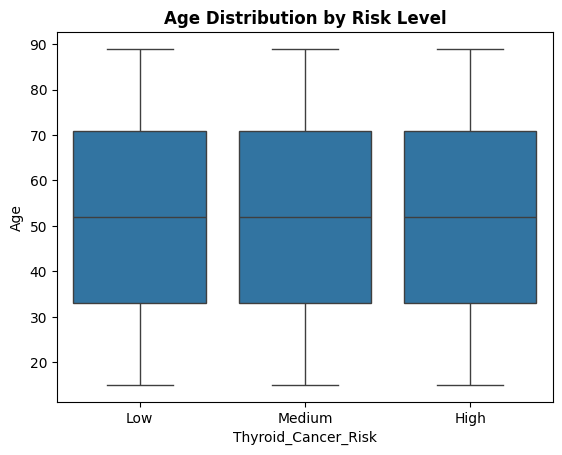

In [ ]:
sns.boxplot(data=df, x='Thyroid_Cancer_Risk', y='Age')
plt.title('Age Distribution by Risk Level',fontweight='bold')
plt.show()


In [ ]:
high_risk = df[df['Thyroid_Cancer_Risk'] == 'High']

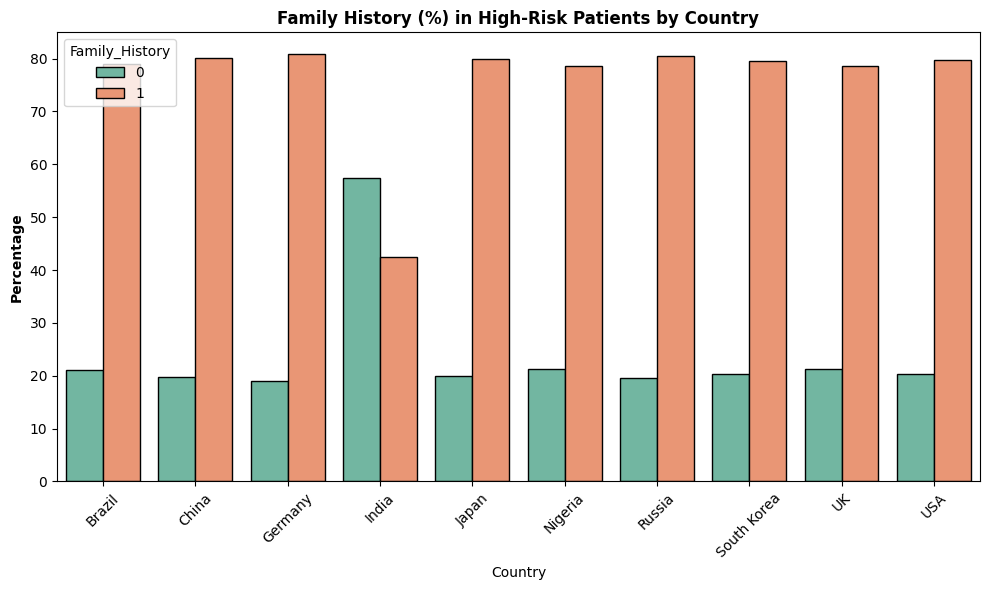

In [ ]:
ct = pd.crosstab(high_risk['Country'], high_risk['Family_History'], normalize='index') * 100
ct = ct.reset_index().melt(id_vars='Country', var_name='Family_History', value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=ct, x='Country', y='Percentage', hue='Family_History', palette='Set2',edgecolor = "black")
plt.title('Family History (%) in High-Risk Patients by Country',fontweight='bold')
plt.ylabel('Percentage',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The dataset was analyzed to explore how various factors relate to thyroid cancer risk. Demographic features like age, gender, and country were examined, revealing that older age groups and certain regions show higher risk. Hormone levels (TSH, T3, T4) were analyzed through distribution plots and correlation analysis, showing significant patterns linked to risk levels.

### Symptoms such as family history, iodine deficiency, obesity, and radiation exposure were found to be more common in high-risk patients, especially in specific countries. Crosstab and heatmaps helped identify these patterns. Bar plots and pie charts were used to visualize the influence of symptoms by region and gender.

### The analysis concluded that age, hormone levels, family history, and iodine deficiency are key contributors to high thyroid cancer risk.